# Chapter 27

# Deep Learning II

1. Deep learning
2. Introduction to Tensorflow
3. Introduction to Keras

## Deep learning

## Introduction to Tensorflow

## Introduction to Keras

In [33]:

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)


2.7.0


In [34]:

datasetFileName = "gokedataset.npz"

with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']


print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


(5,)
(5,)
(5,)


In [35]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


object
int32
<U1
(5,)
(5,)
(5,)


In [36]:
dataLabels[0]

0

In [37]:
dataLabelNames

array(['A', 'B', 'A', 'C', 'C'], dtype='<U1')

In [38]:
classNames = sorted(np.unique(dataLabelNames))
classNames

['A', 'B', 'C']

In [39]:
# model expect shape of image to be 200x200

import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [40]:
dataLabels = dataLabels.astype('uint8')
dataLabels.dtype

dtype('uint8')

In [41]:

# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.3, random_state=42)

print(trainImages.shape)
print(testImages.shape)


(3, 200, 200, 3)
(2, 200, 200, 3)


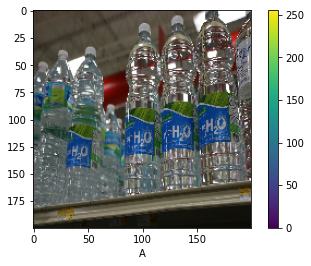

In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [43]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200, 3), 3)

In [44]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0


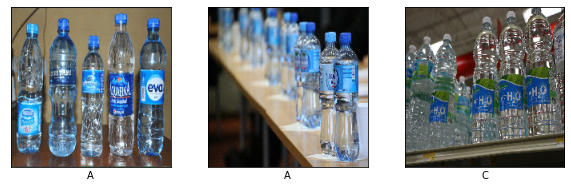

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [46]:
# creating the model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape) #,
    # tf.keras.layers.Softmax()
])
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 120000)            0         
                                                                 
 dense_22 (Dense)            (None, 128)               15360128  
                                                                 
 dense_23 (Dense)            (None, 3)                 387       
                                                                 
Total params: 15,360,515
Trainable params: 15,360,515
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
testImages.dtype

dtype('float64')

In [49]:
model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.1722 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 146ms/step - loss: 164.6698 - accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 132ms/step - loss: 82.9197 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 139ms/step - loss: 4.5218e-04 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 150ms/step - loss: 26.2282 - accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 115ms/step - loss: 27.5202 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 98ms/step - loss: 20.3321 - accuracy: 0.3333
Epoch 8/10
1/1 [==============================] - 0s 117ms/step - loss: 7.0099 - accuracy: 0.3333
Epoch 9/10
1/1 [==============================] - 0s 136ms/step - loss: 7.9473e-08 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 124ms/step - loss: 5.1664 - accuracy: 0.6667


In [50]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

1/1 - 4s - loss: 120.9119 - accuracy: 0.0000e+00 - 4s/epoch - 4s/step

Test accuracy: 0.0


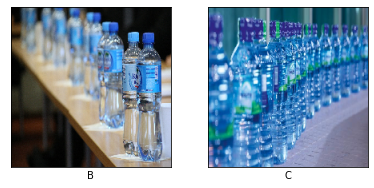

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[testLabels[i]])
plt.show()

In [52]:
predictions = model.predict(testImages)
predictions[0]

array([  91.024666, -124.134224,   62.289345], dtype=float32)

In [53]:
i = 1
predictedLabel = np.argmax(predictions[i])
predictedLabel, testLabels[i], predictedLabel == testLabels[i]

(0, 2, False)

### Using Softmax

Softmax layer assist in turning the prediction values to fractions. Showing the highest value as the most likely.

In [54]:
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probabilityModel.predict(testImages)
predictions[0]


array([1.0000000e+00, 0.0000000e+00, 3.3144283e-13], dtype=float32)

In [55]:
np.argmax(predictions[0]), testLabels[0]

(0, 1)

### Saving Model

In [56]:
import os

exportPath = ""

# if testAcc > 0.95:
modelDir = 'tf_model'
version = f"4_{(testAcc*100):.0f}"

# for SavedModel format
exportPath = os.path.join(modelDir, version)

# save the model
model.save(exportPath, save_format="tf")

print('\nexport path = {}'.format(exportPath))

!dir {exportPath}

INFO:tensorflow:Assets written to: tf_model\4_0\assets

export path = tf_model\4_0
 Volume in drive C is Windows
 Volume Serial Number is 7E8A-CA12

 Directory of c:\zs\cv\advance\tf_model\4_0

11/26/2021  05:11 AM    <DIR>          .
11/26/2021  05:11 AM    <DIR>          ..
11/26/2021  03:19 AM    <DIR>          assets
11/26/2021  05:11 AM             7,570 keras_metadata.pb
11/26/2021  05:11 AM            72,129 saved_model.pb
11/26/2021  05:11 AM    <DIR>          variables
               2 File(s)         79,699 bytes
               4 Dir(s)  13,308,407,808 bytes free


### Load Model

In [57]:
# load SavedModel format

exportPath = 'C:/zs/cv/advance/tf_model/4_0'
newModel = tf.keras.models.load_model(exportPath)

# Check its architecture
newModel.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 120000)            0         
                                                                 
 dense_22 (Dense)            (None, 128)               15360128  
                                                                 
 dense_23 (Dense)            (None, 3)                 387       
                                                                 
Total params: 15,360,515
Trainable params: 15,360,515
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Evaluate the restored model
loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModel.predict(testImages)

print(newPredictions.shape)

newPredictions[0]

1/1 - 0s - loss: 120.9119 - accuracy: 0.0000e+00 - 491ms/epoch - 491ms/step
Restored model, accuracy:  0.00%
(2, 3)


array([  91.024666, -124.134224,   62.289345], dtype=float32)

In [59]:
print("prediction: ", np.argmax(newPredictions[0]))
print("actual: ", testLabels[0])


prediction:  0
actual:  1


In [60]:
probabilityModel = tf.keras.Sequential([newModel, tf.keras.layers.Softmax()])

newPredictions = probabilityModel.predict(testImages)
newPredictions[0]


array([1.0000000e+00, 0.0000000e+00, 3.3144283e-13], dtype=float32)

## Simulation for Best Models

In [61]:
# %%
maxIterations = 10
testAccList = []
thresholdAcc = 0.97
lastTestAcc = 0.0

model = None
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model'
epoch=10

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end='... ')

    model = tf.keras.Sequential([
        # tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    # print('\nTest accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='... ')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        # SavedModel format
        version = f"4_{(testAcc*100):.0f}"

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)
        # save the model
        model.save(exportPath, save_format="tf")
        # print(f'\nexport path = {exportPath}')
        print(f'export path = {exportPath}', end='')

        # # HDF5 format
        # exportPath = os.path.join(modelDir, f"{version}.h5")
        # # Save the entire model to a HDF5 file.
        # # The '.h5' extension indicates that the model should be saved to HDF5.
        # model.save(exportPath)
        # print("saved: ", exportPath)

        thresholdAcc = testAcc
        
    print('.')
    


simulation 1... test accuracy 0.0... .
simulation 2... test accuracy 0.5... .
simulation 3... test accuracy 0.0... .
simulation 4... test accuracy 0.0... .
simulation 5... test accuracy 0.0... .
simulation 6... test accuracy 0.5... .
simulation 7... test accuracy 0.5... .
simulation 8... test accuracy 0.5... .
simulation 9... test accuracy 0.5... .
simulation 10... test accuracy 0.5... .


# Example

Simulate until a threshold accuracy value is obtained else 1000 max iteration.

In [62]:
# %%
maxIterations = 10
testAccList = []
thresholdAcc = 0.97
lastTestAcc = 0.0

model = None
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model'
epoch=10

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end='... ')

    model = tf.keras.Sequential([
        # tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    # print('\nTest accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='... ')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        # SavedModel format
        version = f"4_{(testAcc*100):.0f}"

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)
        # save the model
        model.save(exportPath, save_format="tf")
        # print(f'\nexport path = {exportPath}')
        print(f'export path = {exportPath}', end='')

        # # HDF5 format
        # exportPath = os.path.join(modelDir, f"{version}.h5")
        # # Save the entire model to a HDF5 file.
        # # The '.h5' extension indicates that the model should be saved to HDF5.
        # model.save(exportPath)
        # print("saved: ", exportPath)

        thresholdAcc = testAcc
        
    print('.')
    


simulation 1... test accuracy 0.0... .
simulation 2... test accuracy 0.5... .
simulation 3... test accuracy 0.0... .
simulation 4... test accuracy 0.5... .
simulation 5... test accuracy 0.0... .
simulation 6... test accuracy 0.0... .
simulation 7... test accuracy 0.5... .
simulation 8... test accuracy 0.5... .
simulation 9... test accuracy 0.5... .
simulation 10... test accuracy 0.5... .


# Assignment


1. Upload your [yourname]dataset.npz to whatapp group
2. Vary the parameters from spliting data into trainImage and testImage to find the best accuracy.
3. Predict and dispaly your predictions.

# Assignment 

1. Convert the dataset images to grayscale before training and testing.
Hint: remember that the input shape will change.

# 1 hour Workout

Send your images data to email: gokeladokun@gmail.com 